In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# import module
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #X_train y_train split
from sklearn.preprocessing import StandardScaler #Standarization
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #evaluation (MAE MSE r2)
from sklearn.model_selection import GridSearchCV #Cross Validation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.3.3
pandas version :  2.3.3
seaborn version :  0.13.2


In [10]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# **Exploratory Data Analysis (EDA)**
---


## 1. Data overview

In [11]:
# df=pd.read_csv("/content/drive/MyDrive/Rakamin/Data science/Final Project/data set/employee_churn_prediction_updated.csv")
df=pd.read_csv("dataset/employee_churn_prediction_updated.csv")
df.head()

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,work_location,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,churn_period
0,1,28,Male,High School,0,153,0.94,62,9,4667108,0.03,4,Suburban,3,2.8,0,Married,22,Stayed
1,2,41,Male,Diploma,6,188,0.54,55,8,5853507,0.06,3,Urban,3,2.7,1,Single,36,Onboarding
2,3,36,Female,High School,8,159,0.44,59,10,4781336,0.07,1,Urban,2,1.7,1,Single,17,Onboarding
3,4,32,Male,Diploma,7,185,0.66,68,15,3624588,0.05,1,Urban,2,0.5,1,Married,32,Onboarding
4,5,29,Female,High School,7,142,1.01,45,9,5154327,0.08,3,Rural,2,4.5,0,Single,14,Stayed


Melakukan data load "employee_churn_prediction_updated.csv" dan inisiasikan dalam bentuk df

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

In [13]:
# Menghitung jumlah data kosong di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan jumlah data kosong
print("Jumlah data kosong per kolom:")
print(missing_values)

Jumlah data kosong per kolom:
employee_id                0
age                        0
gender                     0
education                  0
experience_years           0
monthly_target             0
target_achievement         0
working_hours_per_week     0
overtime_hours_per_week    0
salary                     0
commission_rate            0
job_satisfaction           0
work_location              0
manager_support_score      0
company_tenure_years       0
churn                      0
marital_status             0
distance_to_office_km      0
churn_period               0
dtype: int64


Kolom Data terdiri dari (19 kolom, 1000 baris):

* **employee_id** : ID unik karyawan *(int)*.
* **age** : Usia karyawan *(int)*.
* **gender** : Jenis kelamin karyawan *(teks)*.
* **experience_years** : Total tahun pengalaman kerja *(teks)*.
* **monthly_target** : Target bulanan karyawan *(float)*.
* **target_achievement** : Pencapaian target *(float)*.
* **working_hours_per_week** : Jam kerja per minggu *(int)*.
* **overtime_hours_per_week** : Jam lembur per minggu *(int)*.
* **salary** : Gaji pokok *(int)*.
* **commission_rate** : Rate komisi *(float)*.
* **job_satisfaction** : Tingkat kepuasan kerja *(teks)*.
* **work_location** : Lokasi kerja *(teks)*.
* **manager_support_score** : Skor dukungan manajer *(float)*.
* **company_tenure_years** : Masa kerja di perusahaan *(float)*.
* **churn** : Status churn *(teks: Ya/Tidak)*.
* **marital_status** : Status pernikahan *(teks)*.
* **distance_to_office_km** : Jarak rumah ke kantor (km) *(teks)*.
* **churn_period** : Periode churn *(teks)*.

     
Catatan: Semua kolom memiliki 1000 entri non-null. Tipe data campuran:
* float : 13 kolom  
* int : 11 kolom  
* object (teks/string) : 5 kolom

>Semua kolom memiliki 0 nilai kosong → data bersih secara struktural.
     

In [14]:
df['employee_id'].duplicated().sum()

np.int64(0)

>Tidak ada ID karyawan yang terduplikasi. Setiap employee_id unik.

In [15]:
df.duplicated().sum()

np.int64(0)

>Tidak ada baris data (row) yang benar-benar identik secara keseluruhan.

In [16]:
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,work_location,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,churn_period


>Hasil: Tidak ada baris duplikat — semua baris unik.

## 2. Anomali data


**Pengecekan pada usia > pengalaman kerja**

Karyawan tidak mungkin memiliki pengalaman kerja lebih dari usianya dikurangi 18 tahun (asumsi mulai kerja di usia 17+).

In [17]:
# Flag anomali: pengalaman > (usia - 18)
anomaly_experience = df['experience_years'] > (df['age'] - 18)
anomaly_experience.value_counts()

False    926
True      74
Name: count, dtype: int64

Hasil:   
- False: 926 baris → tidak anomali (logis).  
- True: 74 baris → anomali terdeteksi (pengalaman > usia - 18)
     

In [18]:
anomalies = df[anomaly_experience & df['experience_years'].notna() & df['age'].notna()]
anomalies[['employee_id', 'age', 'experience_years']]

,employee_id,age,experience_years
17,18,23,8
20,21,23,7
35,36,24,7
70,71,23,7
90,91,22,9
...,...,...,...
959,960,22,7
968,969,22,8
981,982,22,6
982,983,26,9


In [19]:
df = df[~anomaly_experience].copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 0 to 998
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              926 non-null    int64  
 1   age                      926 non-null    int64  
 2   gender                   926 non-null    object 
 3   education                926 non-null    object 
 4   experience_years         926 non-null    int64  
 5   monthly_target           926 non-null    int64  
 6   target_achievement       926 non-null    float64
 7   working_hours_per_week   926 non-null    int64  
 8   overtime_hours_per_week  926 non-null    int64  
 9   salary                   926 non-null    int64  
 10  commission_rate          926 non-null    float64
 11  job_satisfaction         926 non-null    int64  
 12  work_location            926 non-null    object 
 13  manager_support_score    926 non-null    int64  
 14  company_tenure_years     926 no

**Memeriksa inkonsistensi data churn**

In [21]:
inconsistent = df[
    ((df['churn'] == 0) & (df['churn_period'] != 'Stayed')) |
    ((df['churn'] == 1) & (df['churn_period'] == 'Stayed'))
]
print(f"Baris tidak konsisten: {len(inconsistent)}")

Baris tidak konsisten: 0


> terlihat bahwa kolom churn dan churn_period selaras dan tidak ada inkonsistensi data

**Membagi kolom berdasarkan tipe data nya**

In [22]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
datetime_cols= df.select_dtypes(include=['datetime64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number, 'datetime64']).columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()
# --- Cetak hasilnya dengan format rapi ---
print("Kolom Numerik  :", numerical_cols)
print("Kolom bool:", bool_cols)
print("Kolom Kategorik:", categorical_cols)
print("Kolom Datetime :", datetime_cols)

Kolom Numerik  : ['employee_id', 'age', 'experience_years', 'monthly_target', 'target_achievement', 'working_hours_per_week', 'overtime_hours_per_week', 'salary', 'commission_rate', 'job_satisfaction', 'manager_support_score', 'company_tenure_years', 'churn', 'distance_to_office_km']
Kolom bool: []
Kolom Kategorik: ['gender', 'education', 'work_location', 'marital_status', 'churn_period']
Kolom Datetime : []


> memisah data 'Numerik' & 'kategorik'

## 3. Statistics

In [23]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,926.0,5.041220e+02,2.884973e+02,1.00,256.25,507.50,753.75,999.0
age,926.0,3.361123e+01,6.530928e+00,22.00,28.00,34.00,39.00,44.0
experience_years,926.0,4.240821e+00,2.834402e+00,0.00,2.00,4.00,7.00,9.0
monthly_target,926.0,1.254622e+02,4.389196e+01,50.00,86.00,127.00,163.75,199.0
target_achievement,926.0,7.907775e-01,2.282640e-01,0.40,0.59,0.79,0.99,1.2
working_hours_per_week,926.0,5.415335e+01,8.682398e+00,40.00,46.00,54.00,62.00,69.0
overtime_hours_per_week,926.0,9.429806e+00,5.722118e+00,0.00,5.00,9.00,14.00,19.0
salary,926.0,5.501960e+06,1.442609e+06,3000037.00,4253052.00,5492408.00,6749479.50,7999712.0
commission_rate,926.0,5.879050e-02,2.323663e-02,0.02,0.04,0.06,0.08,0.1
job_satisfaction,926.0,2.514039e+00,1.121446e+00,1.00,2.00,3.00,4.00,4.0


- employee_id: Unik, rentang 1–1000
- age: Rata-rata 32.8 tahun, min 22, max 44 → usia kerja produktif.
- experience_years: Rata-rata 4.5 tahun, max 9 → sebagian besar karyawan berpengalaman muda.
- monthly_target: Rata-rata 125.9, max 199 → target bulanan cukup tinggi.
- target_achievement: Rata-rata 0.79 → rata-rata pencapaian target 79%.
- working_hours_per_week: Rata-rata 54 jam, max 69 → banyak lembur.
- overtime_hours_per_week: Rata-rata 9.5 jam, max 19 → lembur signifikan di beberapa kasus.
- salary: Rata-rata ~5.4 juta, max ~7.9 juta → variasi gaji normal.
- commission_rate: Rata-rata 5.8%, max 10% → komisi rendah hingga sedang.
- job_satisfaction & manager_support_score: Skala 1–5 → rata-rata sekitar 2.5 → kepuasan dan dukungan manajer cenderung rendah.
- company_tenure_years: Rata-rata 0.63 tahun, max 5 → banyak karyawan baru.
- churn: Rata-rata 0.629 → 63% churn rate (biner: 0/1). → sangat tinggi
- distance_to_office_km: Rata-rata 24 km, max 49 km → jarak cukup jauh untuk beberapa karyawan. <br><br>

Pola menunjukkan potensi tekanan kerja (jam kerja tinggi, kepuasan rendah) — relevan untuk prediksi churn.
         

     

In [24]:
df[categorical_cols].describe()

,gender,education,work_location,marital_status,churn_period
count,926,926,926,926,926
unique,2,3,3,2,4
top,Male,Diploma,Urban,Single,Stayed
freq,648,378,458,557,341


- gender: 2 kategori → Male (703), Female (297) — dominan pria.
- education: 3 kategori → Diploma (404) paling umum, disusul S1/S2 dan lainnya.
- work_location: 3 kategori → Urban (500) = 50% — Urban mendominasi.
- marital_status: 2 kategori → Single (606) > Married (394).
- churn_period: 4 kategori → Stayed (371) paling banyak — artinya 629 karyawan churn di periode tertentu.
         
     

In [25]:
df[categorical_cols].value_counts()

gender  education    work_location  marital_status  churn_period
Male    Diploma      Urban          Single          Stayed          35
        High School  Urban          Single          Stayed          24
        Diploma      Suburban       Single          Stayed          21
                     Urban          Single          1 Month         20
                                    Married         Stayed          20
                                                                    ..
Female  High School  Urban          Married         3 Months         1
                     Suburban       Married         3 Months         1
        Diploma      Rural          Married         Onboarding       1
        High School  Suburban       Married         Stayed           1
                     Urban          Married         Stayed           1
Name: count, Length: 140, dtype: int64

In [26]:
# menampilkan nilai unique 'kategorik'
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in 'gender':
['Male' 'Female']
------------------------------
Unique values in 'education':
['High School' 'Diploma' 'Bachelor']
------------------------------
Unique values in 'work_location':
['Suburban' 'Urban' 'Rural']
------------------------------
Unique values in 'marital_status':
['Married' 'Single']
------------------------------
Unique values in 'churn_period':
['Stayed' 'Onboarding' '1 Month' '3 Months']
------------------------------


- gender → 'Male', 'Female' — hanya dua jenis kelamin.
- education → 'High School', 'Diploma', 'Bachelor' — tingkat pendidikan standar.
- work_location → 'Suburban', 'Urban', 'Rural' — lokasi kerja berdasarkan wilayah.
- marital_status → 'Married', 'Single' — status pernikahan sederhana.
- churn_period → 'Stayed', 'Onboarding', '1 Month', '3 Months' — periode churn atau bertahan.
     

## 4. Graphics

**Visualisasi dengan box plot**

Boxplot adalah alat visual yang efektif untuk menilai distribusi dan identifikasi outlier secara statistik, karena:
1. Menunjukkan spread data & titik ekstrem
2. Membantu memutuskan apakah outlier perlu ditangani
3. Mendeteksi bias atau ketidakwajaran sistemik
4. Mendukung keputusan preprocessing

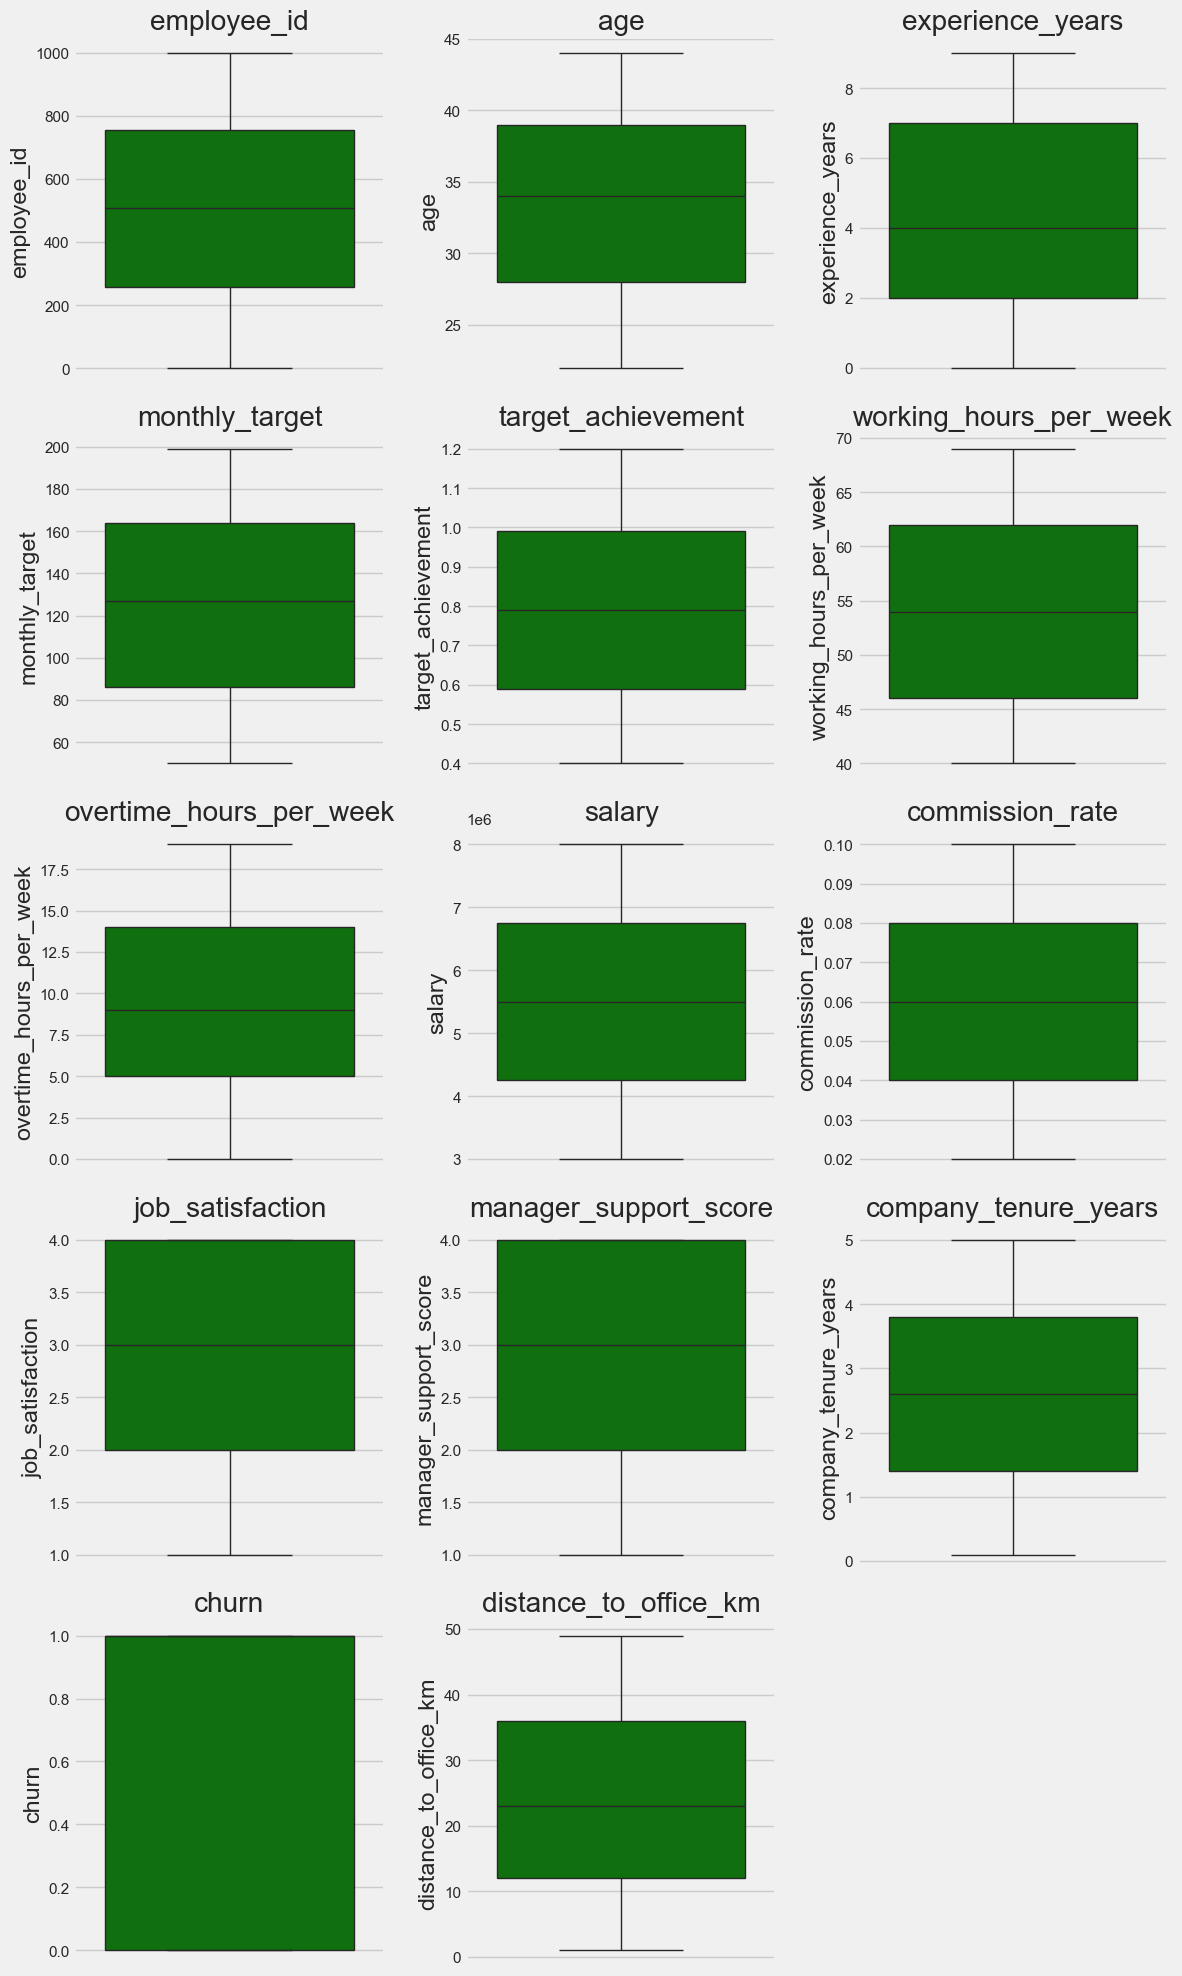

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_cols = numerical_cols
n = len(num_cols)

rows = math.ceil(n/3)
cols = 3

plt.figure(figsize=(12, 4*rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color='green')
    plt.title(col)

plt.tight_layout()
plt.show()


1. Semua data Stabil & Tidak Ada Outlier
- Mayoritas fitur numerik (age, experience_years, target_achievement, job_satisfaction, dll) menunjukkan distribusi yang wajar — tidak ada outlier yang mengganggu.
- Ini berarti tidak perlu transformasi drastis sebelum modeling.

2. Variabel Target (churn) Imbalanced
- Boxplot menunjukkan mayoritas karyawan tidak churn (0) → perlu teknik balancing saat modeling (SMOTE, class weight, dll).
     

     

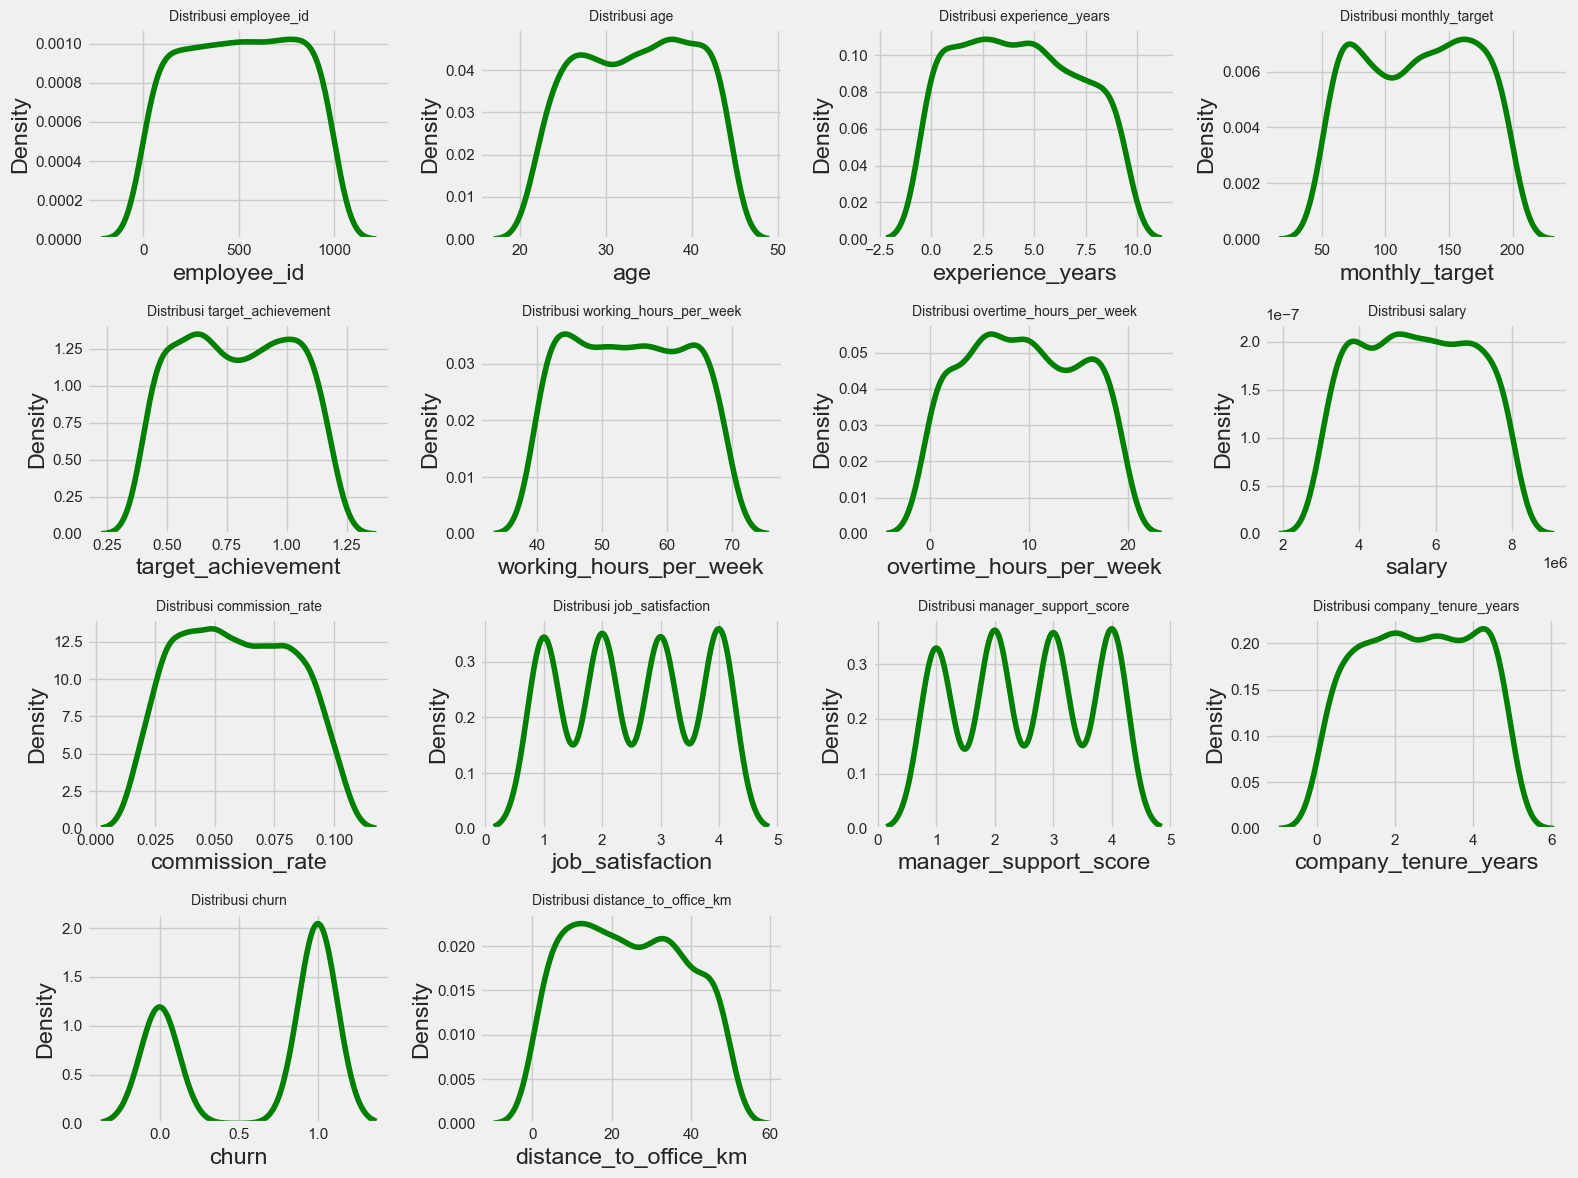

In [28]:
plt.figure(figsize=(16, 12)) # Increased figure size for a 4x4 grid
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i) # Changed subplot grid to 4x4
    sns.kdeplot(df[col], color='green')
    plt.title(f'Distribusi {col}', fontsize=10)
plt.tight_layout()
plt.show()

1. Mayoritas Fitur Berdistribusi Normal atau Mendekati Normal
- age, experience_years, monthly_target, working_hours_per_week, salary, company_tenure_years → bentuk kurva simetris.
- Ini menandakan data cukup stabil dan representatif — tidak ada distorsi ekstrem.

2. target_achievement Terkonsentrasi di Atas 0.5 — Banyak Karyawan Capai Target
- Puncak di sekitar 0.8 → rata-rata pencapaian target tinggi.
- Tapi: Masih ada ekor ke kiri (nilai < 0.5)

3. distance_to_office_km Punya Ekstrem di 0–10 km, Lalu Turun Bertahap
- Mayoritas karyawan tinggal dekat (≤20 km), tapi ada yang sangat jauh (sampai 60 km).
>Jarak > 30 km bisa jadi faktor penambah beban — terutama jika dikombinasikan dengan jam kerja panjang.  

4. churn Menunjukkan Imbalance yang Jelas
- Dua puncak tajam di 0 dan 1 → mayoritas karyawan tidak churn (0), minoritas churn (1).
> Ini memperkuat kebutuhan teknik class balancing saat modeling (SMOTE, class_weight, dll).  

     

     
     
     

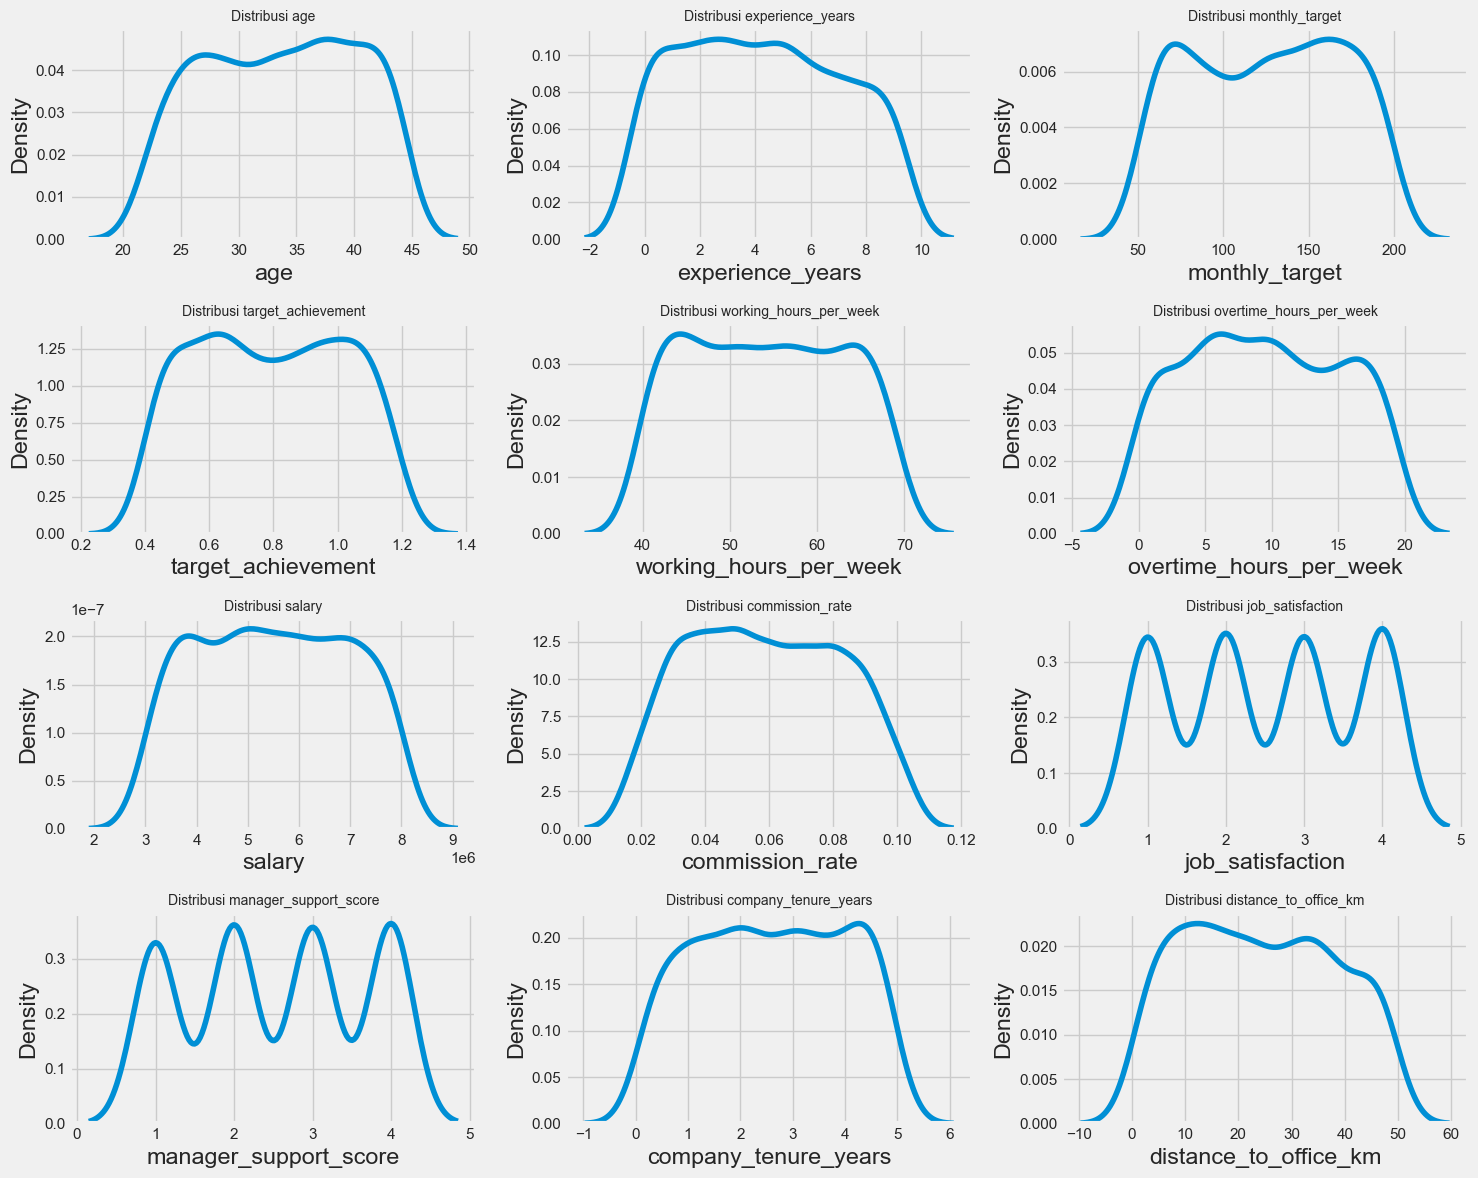

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom yang ingin ditampilkan (sesuai gambar)
columns_to_plot = [
    'age',
    'experience_years',
    'monthly_target',
    'target_achievement',
    'working_hours_per_week',
    'overtime_hours_per_week',
    'salary',
    'commission_rate',
    'job_satisfaction',
    'manager_support_score',
    'company_tenure_years',
    'distance_to_office_km'
]

# Buat plot dengan ukuran figure yang cukup untuk 4x3 grid
plt.figure(figsize=(15, 12))  # Ukuran disesuaikan agar tidak terlalu sempit

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Grid 4 baris x 3 kolom
    sns.kdeplot(df[col])  # Tambahkan fill=True untuk tampilan lebih mirip gambar
    plt.title(f'Distribusi {col}', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

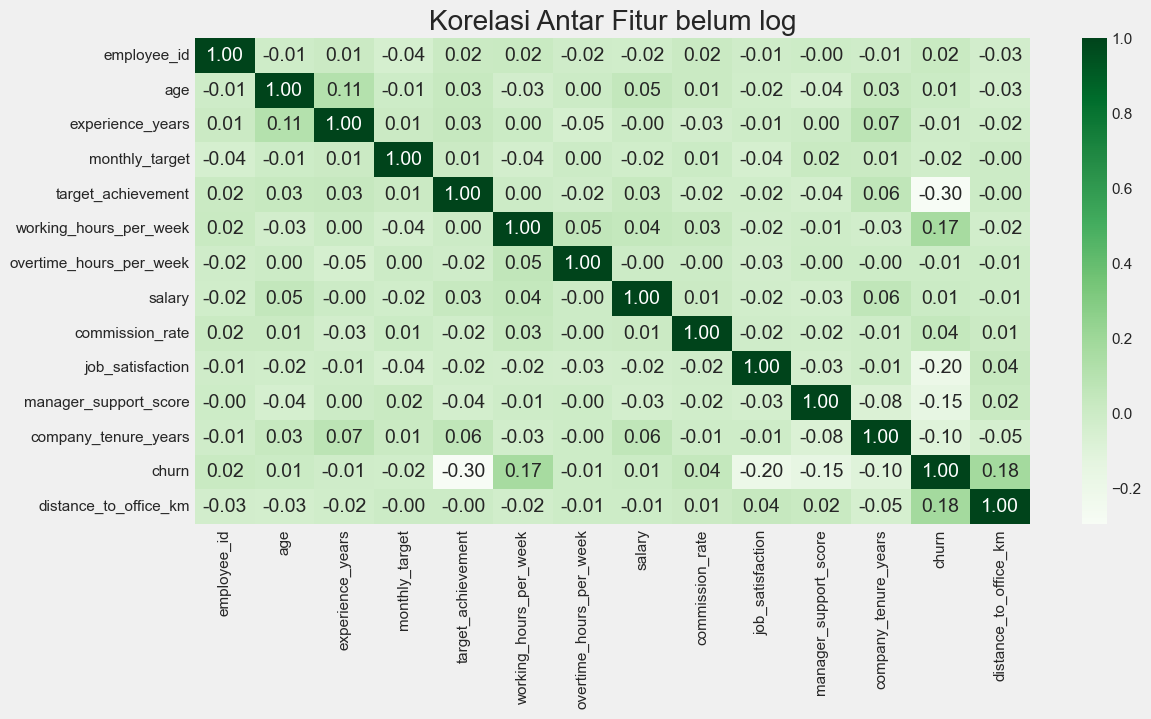

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True, cmap='Greens', fmt=".2f")
plt.title('Korelasi Antar Fitur belum log')
plt.show()

1. Tidak Ada Multikolinearitas Tinggi
- Semua nilai korelasi berada di rentang -0.28 hingga +0.18
- Tidak perlu menghapus fitur karena korelasi tinggi → semua fitur bisa dipakai bersamaan tanpa risiko overfitting akibat redundansi

2. Hubungan dengan Target (churn) Sangat Lemah
- Korelasi tertinggi dengan churn hanya +0.18 (distance_to_office_km) dan -0.28 (target_achievement)
- Semakin rendah pencapaian target → semakin tinggi kemungkinan churn (korelasi negatif lemah).
- Semakin jauh jarak rumah ke kantor → semakin tinggi kemungkinan churn (korelasi positif lemah).

3. employee_id dan Variabel Lainnya Tidak Berkorelasi, bisa di-drop sebelum modeling (jika tidak digunakan untuk tracking)

4. Beberapa Pasangan Fitur Punya Korelasi Negatif
- "target_achievement vs churn": -0.28 → karyawan yang gagal capai target lebih mungkin churn.  
- "job_satisfaction vs churn": -0.21 → kepuasan rendah → risiko churn lebih tinggi.  
- "manager_support_score vs churn": -0.16 → dukungan manajer rendah → sedikit meningkatkan risiko churn.
     

In [31]:
# !pip install ydata-profiling

# import pandas as pd
# df = pd.read_csv("/content/drive/My Drive/Rakamin/Data science/Final Project/data set/employee_churn_prediction_updated.csv")
# profile = ProfileReport(df, title="Profiling Report", explorative=True)
# profile.to_file("profiling_report.html")

# **Feature Engineering**
---

## Encoding & labeling

In [32]:
# Transform gender
df['gender_Male'] = (df['gender'] == 'Male').astype(int)
df['gender_Male'].head()

0    1
1    1
2    0
3    1
4    0
Name: gender_Male, dtype: int64

Transformasi Kolom gender → gender_Male (One-Hot Encoding Sederhana)
- 1 = Male,
- 0 = Female

> Tujuan: Mengubah variabel kategorikal (Male/Female) menjadi numerik biner (1/0) agar bisa diproses model ML.

In [33]:
# labeling aducation
edu_ordinal= {'High School': 0, 'Diploma': 1, 'Bachelor': 2}
df['education_ord'] = df['education'].map(edu_ordinal).astype(int)
df['education_ord'].unique()

array([0, 1, 2])

Labeling Kolom education → education_ord (Ordinal Encoding)  — sesuai urutan pendidikan formal.
- High School = 0,
- Diploma = 1,
- Bachelor = 2

>Tujuan: Mengubah tingkat pendidikan kategorikal menjadi angka berurutan yang mencerminkan hierarki (semakin tinggi = semakin besar nilainya).

In [34]:
# transform martial_status
df['is_married'] = (df['marital_status'] == 'Married').astype(int)
df['is_married'].head()

0    1
1    0
2    0
3    1
4    0
Name: is_married, dtype: int64

Transformasi marital_status → is_married (Binary Encoding)
- Single = 0
- Married = 1

> Tujuan: Mengubah status pernikahan kategorikal menjadi variabel biner (1 = Married, 0 = Single) agar bisa diproses model ML.

In [35]:
#df['churn_period_bin'] = (df['churn_period'] != 'Stayed').astype(int)
#1adf['churn_period_bin'].head()

In [36]:
# one-hot work_location
work_location_dummies = pd.get_dummies(df['work_location'], prefix='work_location', dtype=int)
df = pd.concat([df, work_location_dummies], axis=1)
display(df.head())

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,...,churn,marital_status,distance_to_office_km,churn_period,gender_Male,education_ord,is_married,work_location_Rural,work_location_Suburban,work_location_Urban
0,1,28,Male,High School,0,153,0.94,62,9,4667108,...,0,Married,22,Stayed,1,0,1,0,1,0
1,2,41,Male,Diploma,6,188,0.54,55,8,5853507,...,1,Single,36,Onboarding,1,1,0,0,0,1
2,3,36,Female,High School,8,159,0.44,59,10,4781336,...,1,Single,17,Onboarding,0,0,0,0,0,1
3,4,32,Male,Diploma,7,185,0.66,68,15,3624588,...,1,Married,32,Onboarding,1,1,1,0,0,1
4,5,29,Female,High School,7,142,1.01,45,9,5154327,...,0,Single,14,Stayed,0,0,0,1,0,0


**One-Hot Encoding** work_location → work_location_[Suburban/Urban/Rural]
-  Buat 3 kolom baru: work_location_Suburban, work_location_Urban, work_location_Rural.
- Setiap baris hanya punya satu nilai 1 (yang sesuai lokasinya), sisanya 0.

> Tujuan: Mengubah lokasi kerja kategorikal (non-hierarkis) menjadi kolom biner terpisah — karena tidak ada urutan antar lokasi.

## Penambahan fitur

In [37]:
# Memberi gambaran tentang tekanan kerja per minggu.
df['total_workload'] = (df['working_hours_per_week']) + (df['overtime_hours_per_week'])

# Karyawan yang melebihi target (>1.1) + lembur tinggi (>10 jam).
df['overachiever_high_overtime'] = (df['target_achievement'] > 1.1) & (df['overtime_hours_per_week'] > 10)

# Mengukur efisiensi — bukan hanya hasil, tapi seberapa hemat waktu mencapainya.
df['performance_efficiency'] = df['target_achievement'] / (df['total_workload'] + 1)

# Mengukur “nilai” gaji terhadap ekspektasi kerja — bisa jadi indikator ketidakpuasan.
df['salary_to_target_ratio'] = df['salary'] / (df['monthly_target'] + 1)

# Mengukur apakah gaji sebanding dengan pengalaman — relevan untuk churn karena ketidakadilan.
df['salary_per_exp'] = df['salary'] / (df['experience_years'] + 1)

# Mengukur beban logistik vs beban kerja — semakin tinggi, semakin tidak wajar.
df['long_distance_overwork'] = df['distance_to_office_km'] / (df['working_hours_per_week'] + 1)

# melihat segmen paling rentan churn — prioritas utama untuk intervensi bisnis.
df['high_overtime'] = (df['overtime_hours_per_week'] > df['overtime_hours_per_week'].median()).astype(int)
df['low_satisfaction'] = (df['job_satisfaction'] <= 2).astype(int)
df['high_ot_low_sat'] = df['high_overtime'] & df['low_satisfaction']

1. Encoding Variabel Kategorikal   
- gender → gender_Male (binary encoding: 1 = Male, 0 = Female)  
- marital_status → is_married (binary encoding: 1 = Married, 0 = Single)  
- education → education_ord (ordinal encoding: High School=0, Diploma=1, Bachelor=2)  
- work_location → one-hot encoded menjadi:  
  - work_location_Suburban  
  - work_location_Urban  
  - work_location_Rural

2. Fitur Numerik Gabungan   
- total_working_hour = working_hours_per_week + overtime_hours_per_week
         

3. Fitur Interaksi & Rasio (Domain-Driven)   
- overachiever_high_overtime = (target_achievement > 1.1) & (overtime_hours_per_week > 10)  
- performance_efficiency = target_achievement / (total_working_hour + 1)  
- salary_to_target_ratio = salary / (monthly_target + 1)  
- salary_per_exp = salary / (experience_years + 1)  
- long_distance_overwork = distance_to_office_km / (total_working_hour + 1)  
- high_ot_low_sat = (overtime_hours_per_week > median) & (job_satisfaction < 2)

>  Fitur Baru: 10 kolom tambahan
>- 4 dari encoding,
>- 1 dari penjumlahan
>- 5 dari interaksi/rasio/logika bisnis.
     

## Data Transformation Summary

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 0 to 998
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   employee_id                 926 non-null    int64  
 1   age                         926 non-null    int64  
 2   gender                      926 non-null    object 
 3   education                   926 non-null    object 
 4   experience_years            926 non-null    int64  
 5   monthly_target              926 non-null    int64  
 6   target_achievement          926 non-null    float64
 7   working_hours_per_week      926 non-null    int64  
 8   overtime_hours_per_week     926 non-null    int64  
 9   salary                      926 non-null    int64  
 10  commission_rate             926 non-null    float64
 11  job_satisfaction            926 non-null    int64  
 12  work_location               926 non-null    object 
 13  manager_support_score       926 non-null

Perubahan Jumlah Kolom: Dari 19 → 34 Kolom

**Sebelumnya**: Dataset asli memiliki 19 kolom (berdasarkan output awal DataFrame).
**Sekarang**: Setelah preprocessing & feature engineering, total kolom menjadi 34.
     
>Jumlah Penambahan: +15 kolom

1. Encoding Kategorikal (+6 kolom)
- gender_Male → dari gender  
- is_married → dari marital_status  
- education_ord → dari education  
- work_location_Suburban, work_location_Urban, work_location_Rural → dari work_location (one-hot)
     
2. Fitur Gabungan (+1 kolom)
- total_working_hour = working_hours_per_week + overtime_hours_per_week

3. Fitur Interaksi & Logika Bisnis (+8 kolom)
- overachiever_high_overtime  
- performance_efficiency  
- salary_to_target_ratio  
- salary_per_exp  
- long_distance_overwork  
- high_ot_low_sat
     

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,926.0,5.041220e+02,2.884973e+02,1.000000e+00,2.562500e+02,5.075000e+02,7.537500e+02,9.990000e+02
age,926.0,3.361123e+01,6.530928e+00,2.200000e+01,2.800000e+01,3.400000e+01,3.900000e+01,4.400000e+01
experience_years,926.0,4.240821e+00,2.834402e+00,0.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,9.000000e+00
monthly_target,926.0,1.254622e+02,4.389196e+01,5.000000e+01,8.600000e+01,1.270000e+02,1.637500e+02,1.990000e+02
target_achievement,926.0,7.907775e-01,2.282640e-01,4.000000e-01,5.900000e-01,7.900000e-01,9.900000e-01,1.200000e+00
working_hours_per_week,926.0,5.415335e+01,8.682398e+00,4.000000e+01,4.600000e+01,5.400000e+01,6.200000e+01,6.900000e+01
overtime_hours_per_week,926.0,9.429806e+00,5.722118e+00,0.000000e+00,5.000000e+00,9.000000e+00,1.400000e+01,1.900000e+01
salary,926.0,5.501960e+06,1.442609e+06,3.000037e+06,4.253052e+06,5.492408e+06,6.749480e+06,7.999712e+06
commission_rate,926.0,5.879050e-02,2.323663e-02,2.000000e-02,4.000000e-02,6.000000e-02,8.000000e-02,1.000000e-01
job_satisfaction,926.0,2.514039e+00,1.121446e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00


## **Insight Bisnis**

Perusahaan mengalami churn 62.9% dari total 1000 karyawan (<i>standar industri 15-20%</i>)
1. mayoritas usia = 32.8 tahun (<i>rata-rata</i>)
2. mayoritas pengalaman kerja = 4.5 tahun (<i>rata-rata</i>)
3. mayoritas bertahan = 2.6 tahun bekerja (<i>rata-rata</i>)
> Indikasi retensi karyawan early-career
4. tekanan kerja tinggi:
 - terlihat dari jam kerja 54 jam per minggu (<i>rata-rata</i>)
 - overtime 9.5 jam per minggu (<i>rata-rata</i>)
 - capaian target 79%
> indikasi tuntutan performa yang besar
5. rata-rata jarak dari rumah ke kantor = 24 KM
> indikasi penyebab kelelahan (work-life inbalance)
6. tingkat kepuasan kerja 2.52 (dari skala 4)
7. dukungan manajer 2.53 (dari skala 4)
> indikasi kurangnya dukungan manajerial, tidak cukup untuk bisa mempertahankan karyawan dengan kondisi tekanan kerja yang tinggi
<br>

**Kesimpulan**
Kombinasi masa kerja pendek (2.6 tahun), tekanan target tinggi, jam kerja panjang, commute jauh, dan dukungan manajerial yang belum optimal menjadi faktor utama tingginya churn. Perusahaan perlu memperkuat program onboarding, meningkatkan kualitas dukungan manajer, menyeimbangkan beban kerja, dan mempertimbangkan fleksibilitas kerja untuk menurunkan churn dan menjaga keberlanjutan tenaga kerja yang produktif.


---
Secara skala Dengan 5 hari kerja standar, rata-rata lembur karyawan adalah sekitar ~ 1 jam 54 menit lembur per hari

**Skema Jam kerja**
- Pola 5 hari kerja:
  - 8 jam per hari | total 40 jam seminggu | dengan 2 hari libur.
- Pola 6 hari kerja:
  - 7 jam per hari | total 40 jam seminggu | dengan 1 hari libur.

dari data saya jam kerja dalam 5 hari:
- 54.102 ÷ 5 = 10.8204 jam/hari *≈ 10 jam 49 menit per hari*

Jika 6 Hari kerja maka:
- 54.102 ÷ 6 = 9.017 jam/hari *≈ 9 jam 1 menit per hari*

Anggapan bahwa pulang jam 5 berarti jam mulai kerja jam 6.25
hal itu sudah melanggar ketentuan uud dari jam kerja di indonesia
___

Seandainya data Working sudah menghitung lembur maka
Hitung jam kerja normal mingguan
54.102 − 9.508 = 44.594 jam/minggu berarti 8,9188 jam / hari (5 hari)

Karyawan bekerja rata-rata 54 jam per minggu, termasuk sekitar 9.5 jam lembur. Tanpa lembur, jam kerja normal sekitar 44.6 jam per minggu atau hampir 9 jam per hari, sedikit di atas standar 40 jam mingguan dan 8 jam/ hari sesuai UU ketanagakerjaan Indonesia.

---
**Faktor–Faktor yang Memperparah Tingkat Churn**

Tingkat churn yang sangat tinggi (62.9%) dalam data ini diperparah oleh beberapa kondisi utama, yaitu:

1. **Jam kerja melebihi standar**<br>
Rata-rata bekerja hampir **<u>11 jam per hari</u>**, jauh di atas standar 8 jam, yang memicu kelelahan fisik dan mental.

2. **Lembur yang konsisten**<br>
Lembur sekitar **<u>1.9 jam per hari atau ~9.5 jam per minggu</u>**, menunjukkan tekanan kerja yang berkelanjutan.

3. **Target kerja tinggi dan pencapaian belum optimal**<br>
**<u>Target rata-rata 126, namun pencapaian hanya ~79%**</u>, menandakan tekanan kinerja dan potensi stress.

4. **Tenure pendek**<br>
Rata-rata **<u>karyawan hanya bertahan 2.6 tahun</u>**, menunjukkan lemahnya retensi terutama pada fase awal kerja.

5. **Karyawan dominan usia muda dan belum menikah**<br>
Kelompok usia ini cenderung lebih mobile dan mudah berpindah kerja jika kondisi kerja tidak mendukung.

6. **Jarak perjalanan kerja jauh**<br>
Karyawan melakukan **<u>perjalanan rata-rata 24 km ke kantor</u>**, berpotensi meningkatkan fatigue dan mengurangi work-life balance.

7. **Dukungan manajerial & kepuasan kerja sedang**<br>
**<u>Skor 2.52–2.53 dari 4</u>** menunjukkan engagement belum kuat untuk menahan karyawan dalam kondisi kerja berat.

# Feature Selection

In [40]:
numerical_cols = ['age', 'experience_years', 'monthly_target', 'target_achievement', 'working_hours_per_week', 'overtime_hours_per_week',
                  'salary', 'commission_rate', 'job_satisfaction', 'manager_support_score', 'company_tenure_years', 'distance_to_office_km',
                  'total_workload','overachiever_high_overtime','performance_efficiency','salary_to_target_ratio','salary_per_exp',
                  'long_distance_overwork','high_overtime','low_satisfaction','high_ot_low_sat']
categorical_cols = ['is_married','work_location_Rural','education_ord','work_location_Urban','work_location_Suburban','gender_Male']
target= 'churn'

In [41]:
from scipy.stats import chi2_contingency

# Filter out 'churn' from the list as it is the target variable
features_to_test = [col for col in categorical_cols if col != 'churn']

chi_results_engineered = []

for col in features_to_test:
    # Skip columns that have only one unique value (no variance for chi-square)
    if df[col].nunique() <= 1:
        continue

    # Create contingency table
    contingency = pd.crosstab(df[col], df['churn'])

    # Perform Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency)

    chi_results_engineered.append([col, p_value])

# Convert results to DataFrame
chi_df_engineered = pd.DataFrame(chi_results_engineered, columns=['Feature', 'P_Value'])

# Sort by P-Value to see most significant associations first
chi_df_engineered = chi_df_engineered.sort_values('P_Value')

print("\n=== Chi-Square Test Results for Engineered Categorical Features ===")
print(chi_df_engineered)


=== Chi-Square Test Results for Engineered Categorical Features ===
                  Feature   P_Value
0              is_married  0.000002
1     work_location_Rural  0.508685
2           education_ord  0.636012
3     work_location_Urban  0.666870
5             gender_Male  0.780621
4  work_location_Suburban  0.977915


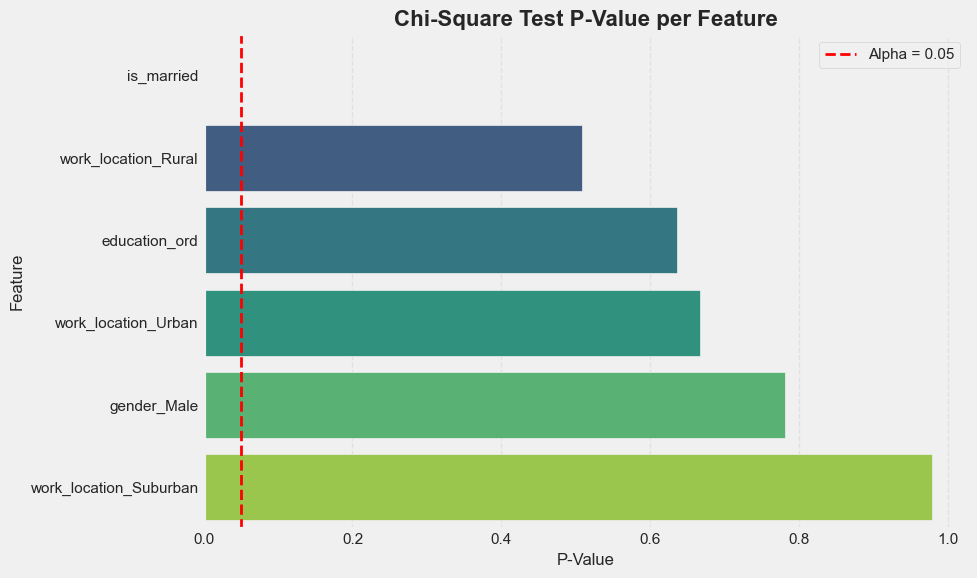

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ====== 1) GRAFIK P-VALUE + GARIS BATAS SIGNIFIKAN ======
alpha = 0.05  # threshold signifikan

plt.figure(figsize=(10, 6))
sns.barplot(
    data=chi_df_engineered.sort_values("P_Value"),
    x="P_Value",
    y="Feature",
    palette="viridis"
)

# garis batas signifikan
plt.axvline(alpha, color='red', linestyle='--', linewidth=2, label='Alpha = 0.05')

plt.title("Chi-Square Test P-Value per Feature", fontsize=16, fontweight='bold')
plt.xlabel("P-Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


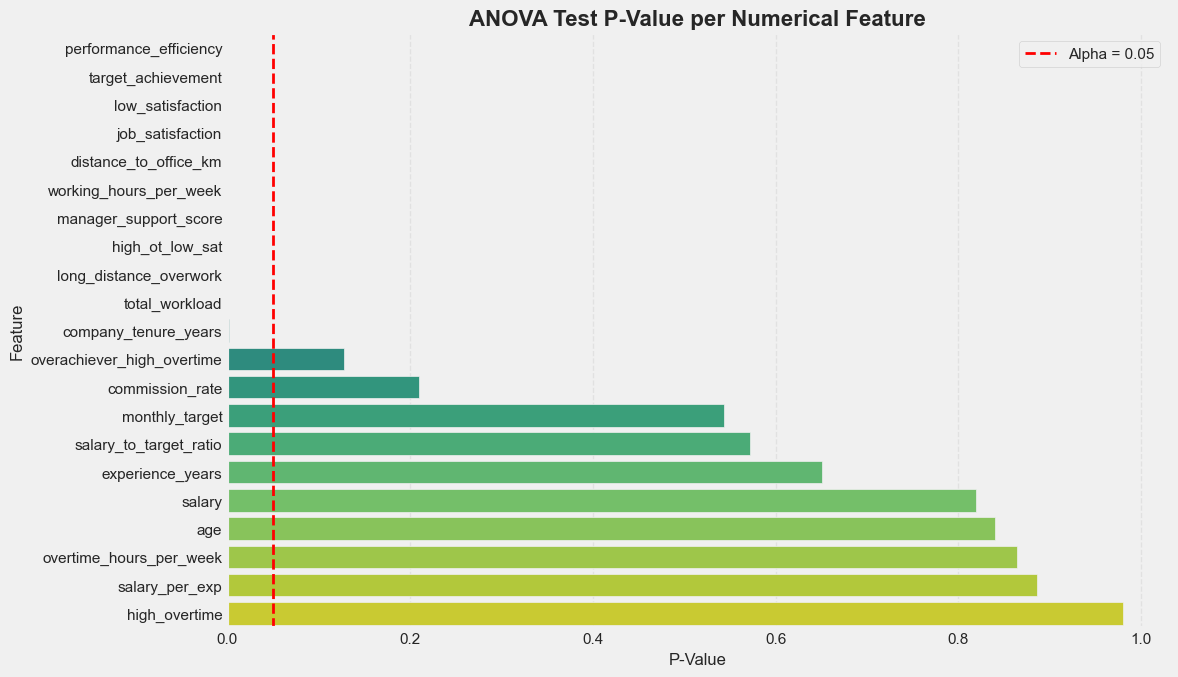

In [43]:
from scipy.stats import f_oneway

# Identify numerical columns (exclude churn)
anova_results = []

# ANOVA for each numerical feature
for col in numerical_cols:
    group0 = df[df['churn'] == 0][col].dropna()
    group1 = df[df['churn'] == 1][col].dropna()

    if len(group0) > 1 and len(group1) > 1:
        stat, p = f_oneway(group0, group1)
        anova_results.append([col, p])

# Convert to DataFrame
anova_df = pd.DataFrame(anova_results, columns=['Feature', 'P_Value'])
anova_df = anova_df.sort_values("P_Value")

# Plot p-values with alpha threshold
alpha = 0.05
plt.figure(figsize=(12, 7))
sns.barplot(
    data=anova_df,
    x="P_Value",
    y="Feature",
    palette="viridis"
)

plt.axvline(alpha, color='red', linestyle='--', linewidth=2, label='Alpha = 0.05')

plt.title("ANOVA Test P-Value per Numerical Feature", fontsize=16, fontweight='bold')
plt.xlabel("P-Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

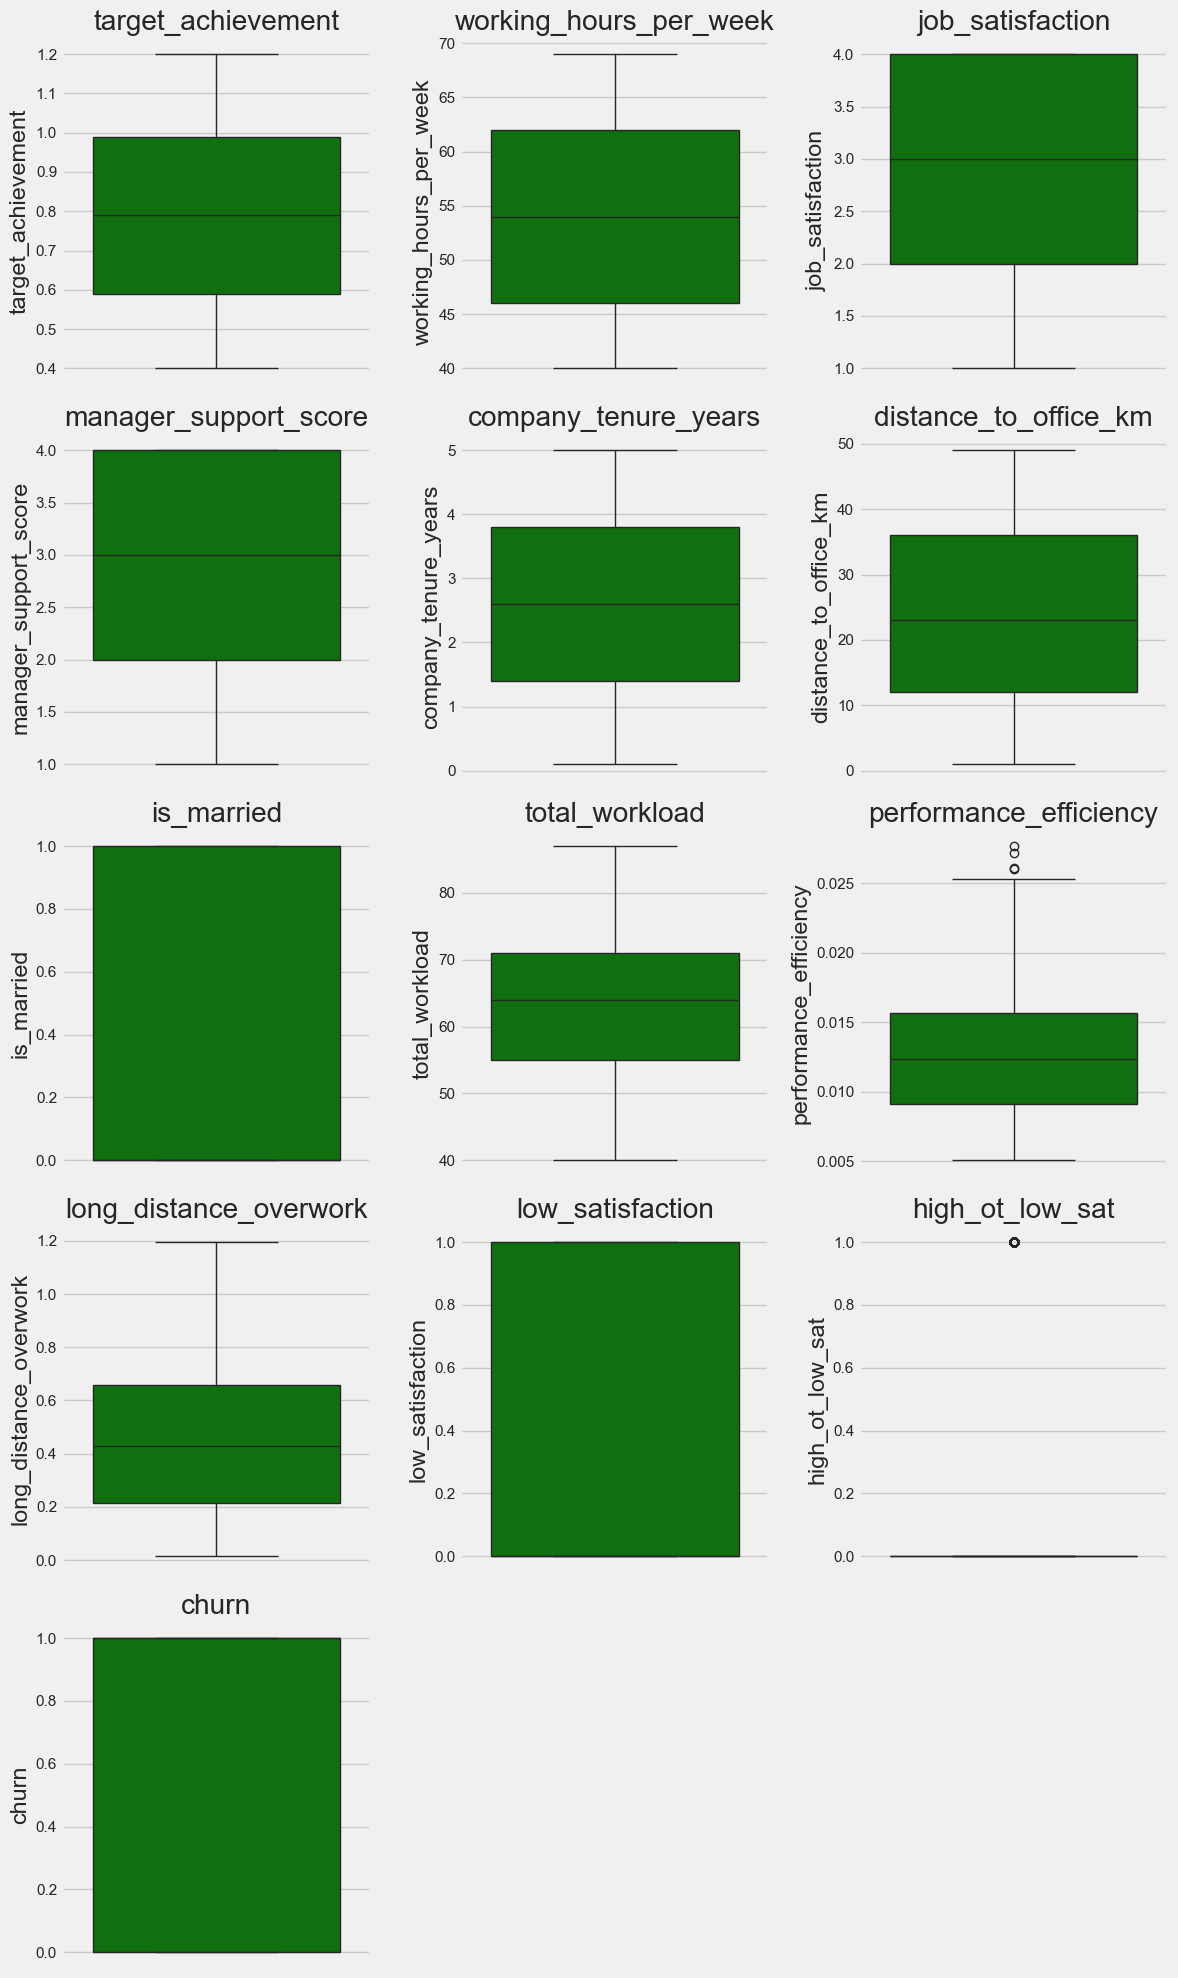

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features=['target_achievement',
 'working_hours_per_week',
 'job_satisfaction',
 'manager_support_score',
 'company_tenure_years',
 'distance_to_office_km',
 'is_married',
 'total_workload',
 'performance_efficiency',
 'long_distance_overwork',
 'low_satisfaction',
 'high_ot_low_sat',

  'churn']

# cek distribusi
n = len(features)

rows = math.ceil(n/3)
cols = 3

plt.figure(figsize=(12, 4*rows))

for i, col in enumerate(features , 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color='green')
    plt.title(col)

plt.tight_layout()
plt.show()

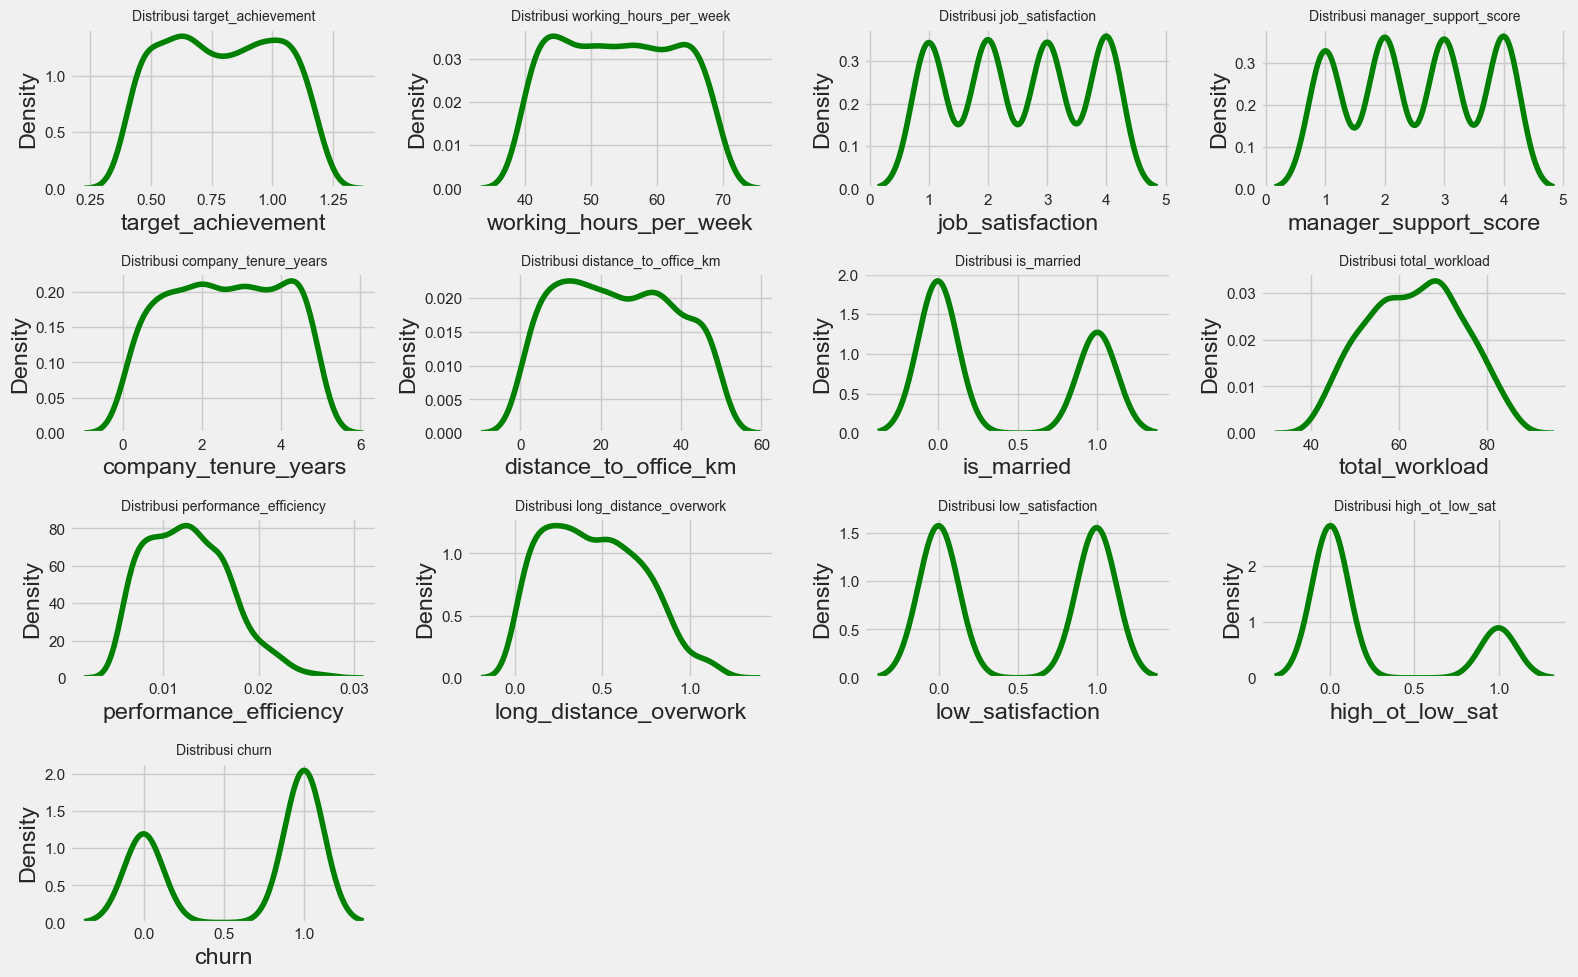

In [45]:
plt.figure(figsize=(16, 12)) # Increased figure size for a 4x4 grid
for i, col in enumerate(features, 1):
    plt.subplot(5, 4, i) # Changed subplot grid to 4x4
    sns.kdeplot(df[col], color='green')
    plt.title(f'Distribusi {col}', fontsize=10)
plt.tight_layout()
plt.show()

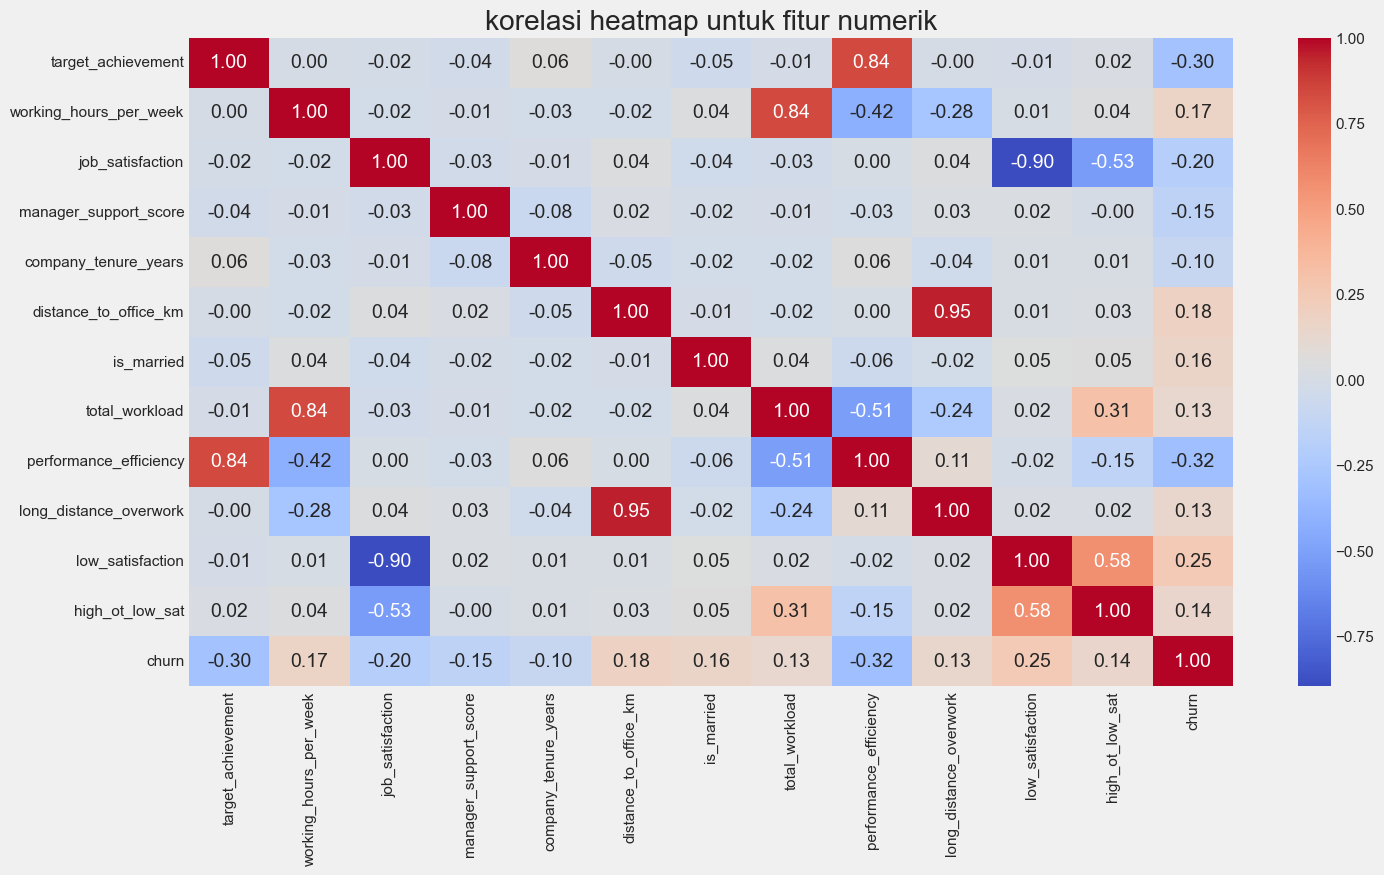

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(
    df[features].corr(),
    annot=True, cmap='coolwarm', fmt=".2f")
plt.title('korelasi heatmap untuk fitur numerik')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

feat = [col for col in features if col != 'churn']

X = df[features]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)  # atau n_components=0.95 untuk pertahankan 95% variance
X_pca = pca.fit_transform(X_scaled)

print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Total variance retained:', sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.21292207 0.17620008]
Total variance retained: 0.38912214613676493


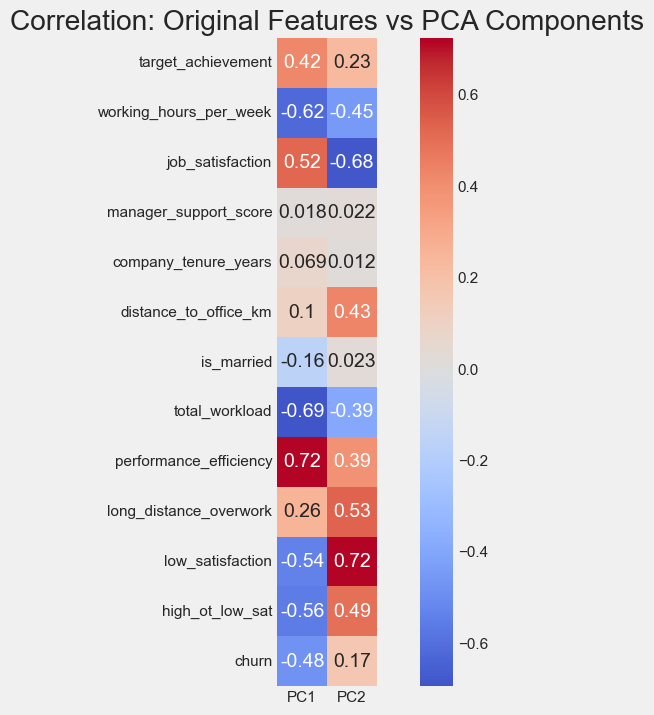

In [63]:
# Hitung korelasi antara fitur asli dan komponen PCA
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Gabungkan untuk analisis korelasi
combined_df = pd.concat([X_scaled_df, X_pca_df], axis=1)

# Hitung korelasi antara fitur asli dan PC
corr_feat_pc = X_scaled_df.corrwith(X_pca_df, axis=0)

# Atau buat korelasi antar semua (lebih lengkap)
corr_full = combined_df.corr()

# Fokus ke korelasi antara fitur asli dan PC
features_vs_pca = corr_full.loc[X.columns, X_pca_df.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(features_vs_pca, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation: Original Features vs PCA Components')
plt.show()

=======================================================================================================

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Map churn_period to ordinal (for EDA ordering)
order_map = {'Stayed': 0, 'Onboarding': 1, '1 Month': 2, '3 Months': 3}
df['churn_period_ord'] = df['churn_period'].map(order_map)

# Distribution (counts and percents)
dist = (
    df['churn_period']
    .value_counts(dropna=False)
    .rename_axis('churn_period')
    .reset_index(name='count')
)
# Order rows by defined order
dist['__order'] = dist['churn_period'].map(order_map)
dist = dist.sort_values('__order').drop(columns='__order')
dist['percent'] = (dist['count'] / len(df) * 100).round(2)

# Summary metrics by churn_period
metrics = [
    'company_tenure_years',
    'working_hours_per_week',
    'overtime_hours_per_week',
    'distance_to_office_km',
    'target_achievement',
    'job_satisfaction',
    'manager_support_score'
]
summary = (
    df.groupby('churn_period')[metrics]
    .mean()
    .round(2)
    .reset_index()
)
summary['__order'] = summary['churn_period'].map(order_map)
summary = summary.sort_values('__order').drop(columns='__order')

# Merge overview
overview = dist.merge(summary, on='churn_period', how='left')



# Display tables to user
display(dist)
display(summary)
display(overview)



,churn_period,count,percent
0,Stayed,341,36.83
3,Onboarding,172,18.57
1,1 Month,234,25.27
2,3 Months,179,19.33


,churn_period,company_tenure_years,working_hours_per_week,overtime_hours_per_week,distance_to_office_km,target_achievement,job_satisfaction,manager_support_score
3,Stayed,2.78,52.26,9.47,20.86,0.88,2.81,2.76
2,Onboarding,2.49,55.80,9.72,24.65,0.74,2.30,2.35
0,1 Month,2.37,55.00,9.18,26.73,0.74,2.32,2.37
1,3 Months,2.63,55.06,9.41,26.58,0.73,2.41,2.51


,churn_period,count,percent,company_tenure_years,working_hours_per_week,overtime_hours_per_week,distance_to_office_km,target_achievement,job_satisfaction,manager_support_score
0,Stayed,341,36.83,2.78,52.26,9.47,20.86,0.88,2.81,2.76
1,Onboarding,172,18.57,2.49,55.80,9.72,24.65,0.74,2.30,2.35
2,1 Month,234,25.27,2.37,55.00,9.18,26.73,0.74,2.32,2.37
3,3 Months,179,19.33,2.63,55.06,9.41,26.58,0.73,2.41,2.51


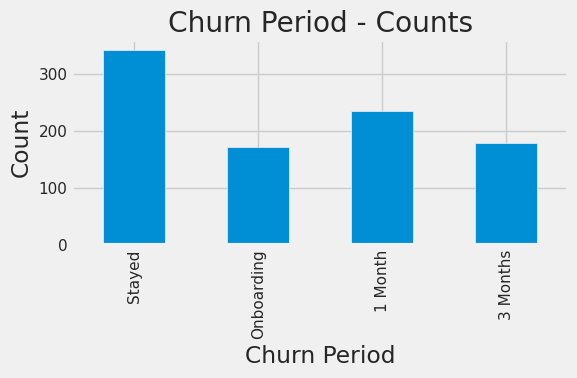

In [ ]:
# 1) Count bar
plt.figure(figsize=(6,4))
dist_plot = dist.set_index('churn_period')['count']
dist_plot.plot(kind='bar')
plt.title('Churn Period - Counts')
plt.xlabel('Churn Period')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

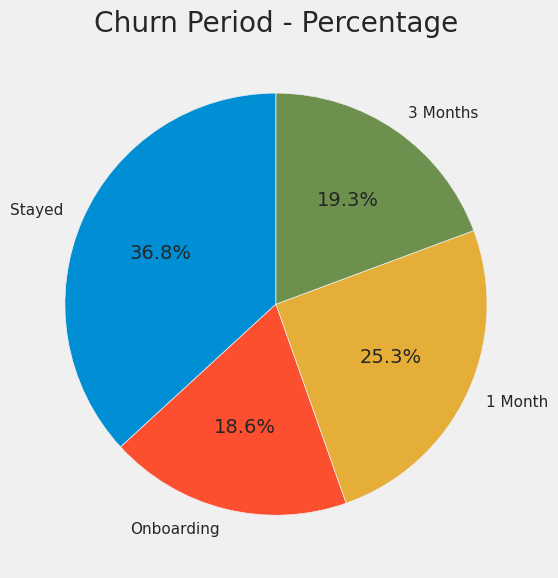

In [ ]:
plt.figure(figsize=(6,6))
pct_plot = dist.set_index('churn_period')['percent']

plt.pie(
    pct_plot,
    labels=pct_plot.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Churn Period - Percentage')
plt.tight_layout()
plt.show()

1.  Mayoritas karyawan churn terjadi di fase awal kerja

* Onboarding: 18.9%

* Month: 25.3%

* Months: 18.7%

Artinya 62.9% churn terjadi dalam 3 bulan pertama, menandakan proses adaptasi, onboarding, dan engagement awal karyawan masih lemah.

2. Karyawan yang bertahan lebih lama memiliki performa & pengalaman lebih baik

* Karyawan yang bertahan memiliki karakteristik terbaik dibanding periode churn lainnya.
Mereka rata-rata memiliki masa kerja lebih panjang (≈2.78 tahun), tingkat pencapaian target lebih tinggi (≈0.88), serta tingkat kepuasan kerja dan dukungan manajer di atas rata-rata. Jam kerja mereka juga sedikit lebih rendah dibandingkan kelompok yang keluar.
Secara umum, ini menunjukkan bahwa karyawan yang mampu beradaptasi dengan tuntutan kerja dan merasa didukung oleh manajemen lebih cenderung tetap bertahan.

* Kelompok yang churn pada tahap onboarding memiliki skor kinerja dan kepuasan paling rendah.
Dengan target achievement rata-rata hanya sekitar 0.75, ditambah kepuasan kerja dan dukungan manajer yang lebih rendah dibandingkan kelompok lainnya, mereka gagal membentuk engagement sejak awal.
Jam kerja juga lebih tinggi, dan jarak tempat tinggal relatif jauh, sehingga orientasi awal belum optimal dalam membantu adaptasi karyawan baru.

* Karyawan yang keluar dalam satu bulan pertama menunjukkan pola mirip kelompok onboarding — pencapaian target rendah (≈0.75) dan beban kerja tinggi.
Meskipun kepuasan sedikit lebih baik daripada fase onboarding, jarak tempuh lebih jauh (≈26 km) dan dukungan manajer tetap rendah.
Ini mengindikasikan masa adaptasi yang masih berat dan kemungkinan rasa tidak cocok dengan kultur kerja secara cepat.

* Karyawan yang churn dalam tiga bulan masih menunjukkan masalah beban kerja dan jarak tempuh, bahkan cenderung paling jauh (≈27 km).
Mereka sedikit lebih puas dibandingkan kelompok bulan pertama, namun pencapaian target tetap rendah (≈0.73), sehingga kemungkinan besar mereka mengalami tekanan performa atau kelelahan sebelum mencapai stabilitas kerja.



3. Beban kerja dan commuting mempengaruhi churn

* Stayed Karyawan yang tetap bertahan memiliki rata-rata jam kerja lebih rendah, sekitar 52 jam per minggu, dengan lembur sekitar 9.5 jam.
Mereka juga tinggal lebih dekat ke kantor, rata-rata 21 km, sehingga tingkat kelelahan fisik dan stres perjalanan lebih terkontrol.
Kondisi ini membantu mereka menjaga keseimbangan kerja–hidup dan daya tahan dalam jangka panjang.

* Onboarding (keluar saat masa orientasi) Karyawan yang churn pada fase onboarding langsung menghadapi jadwal kerja cukup tinggi, sekitar 56 jam per minggu, dengan lembur hampir sama seperti kelompok lain.
Ditambah jarak tempat tinggal yang lebih jauh, sekitar 25 km, hal ini membuat masa adaptasi lebih berat, sehingga mereka kesulitan menyesuaikan diri dan memilih keluar lebih cepat.

* 1 Month (keluar di bulan pertama) Pada bulan pertama, beban kerja tetap tinggi, sekitar 55 jam per minggu, dan mereka rata-rata tinggal lebih jauh dari kantor, sekitar 26 km.
Kombinasi jam kerja padat dan perjalanan panjang menyebabkan potensi kelelahan lebih cepat, yang menjadi salah satu pemicu resign dini.

* 3 Months (keluar di bulan ketiga) Karyawan yang keluar pada bulan ketiga juga menunjukkan pola yang sama: beban kerja tinggi, sekitar 55 jam per minggu, dan jarak rumah–kantor paling jauh, mendekati 27 km.
Pada titik ini, akumulasi stres kerja dan jarak perjalanan kemungkinan membuat mereka kehilangan motivasi dan memutuskan keluar sebelum memasuki fase masa kerja yang stabil.


4. Onboarding → indikator paling kritis

Karyawan yang churn saat onboarding memiliki:

* Target achievement terendah (0.75)

* Kepuasan kerja terendah (2.28)

* Dukungan manajer terendah (2.32)

Ini sinyal kuat bahwa kinerja, adaptasi, dan suportivitas awal menentukan retensi.

**Kesimpulan Utama **
Tingkat churn tinggi terutama dipicu oleh kegagalan retensi di 3 bulan pertama, kinerja awal rendah, beban kerja tinggi, jarak kantor jauh, serta kepuasan dan dukungan manajer yang rendah.

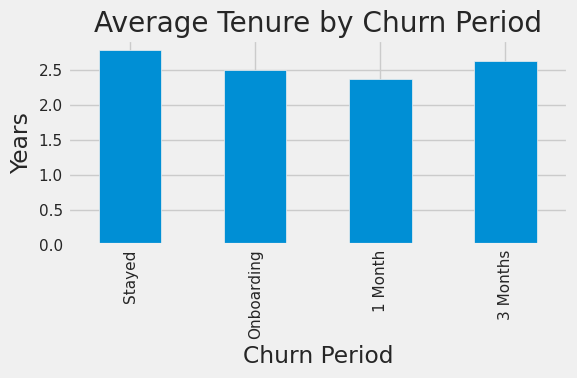

In [ ]:
# 3) Average tenure by churn period
plt.figure(figsize=(6,4))
tenure_plot = summary.set_index('churn_period')['company_tenure_years']
tenure_plot.plot(kind='bar')
plt.title('Average Tenure by Churn Period')
plt.xlabel('Churn Period')
plt.ylabel('Years')
plt.tight_layout()
plt.show()

**Implikasi HR & Rekomendasi**

1. Perkuat onboarding & buddy system
2. Tingkatkan supervisi & coaching awal
3. Program peningkatan engagement untuk karyawan baru
4. Kelola beban kerja agar lebih realistis
5. Pertimbangkan opsi hybrid/transport support bagi yang rumahnya jauh

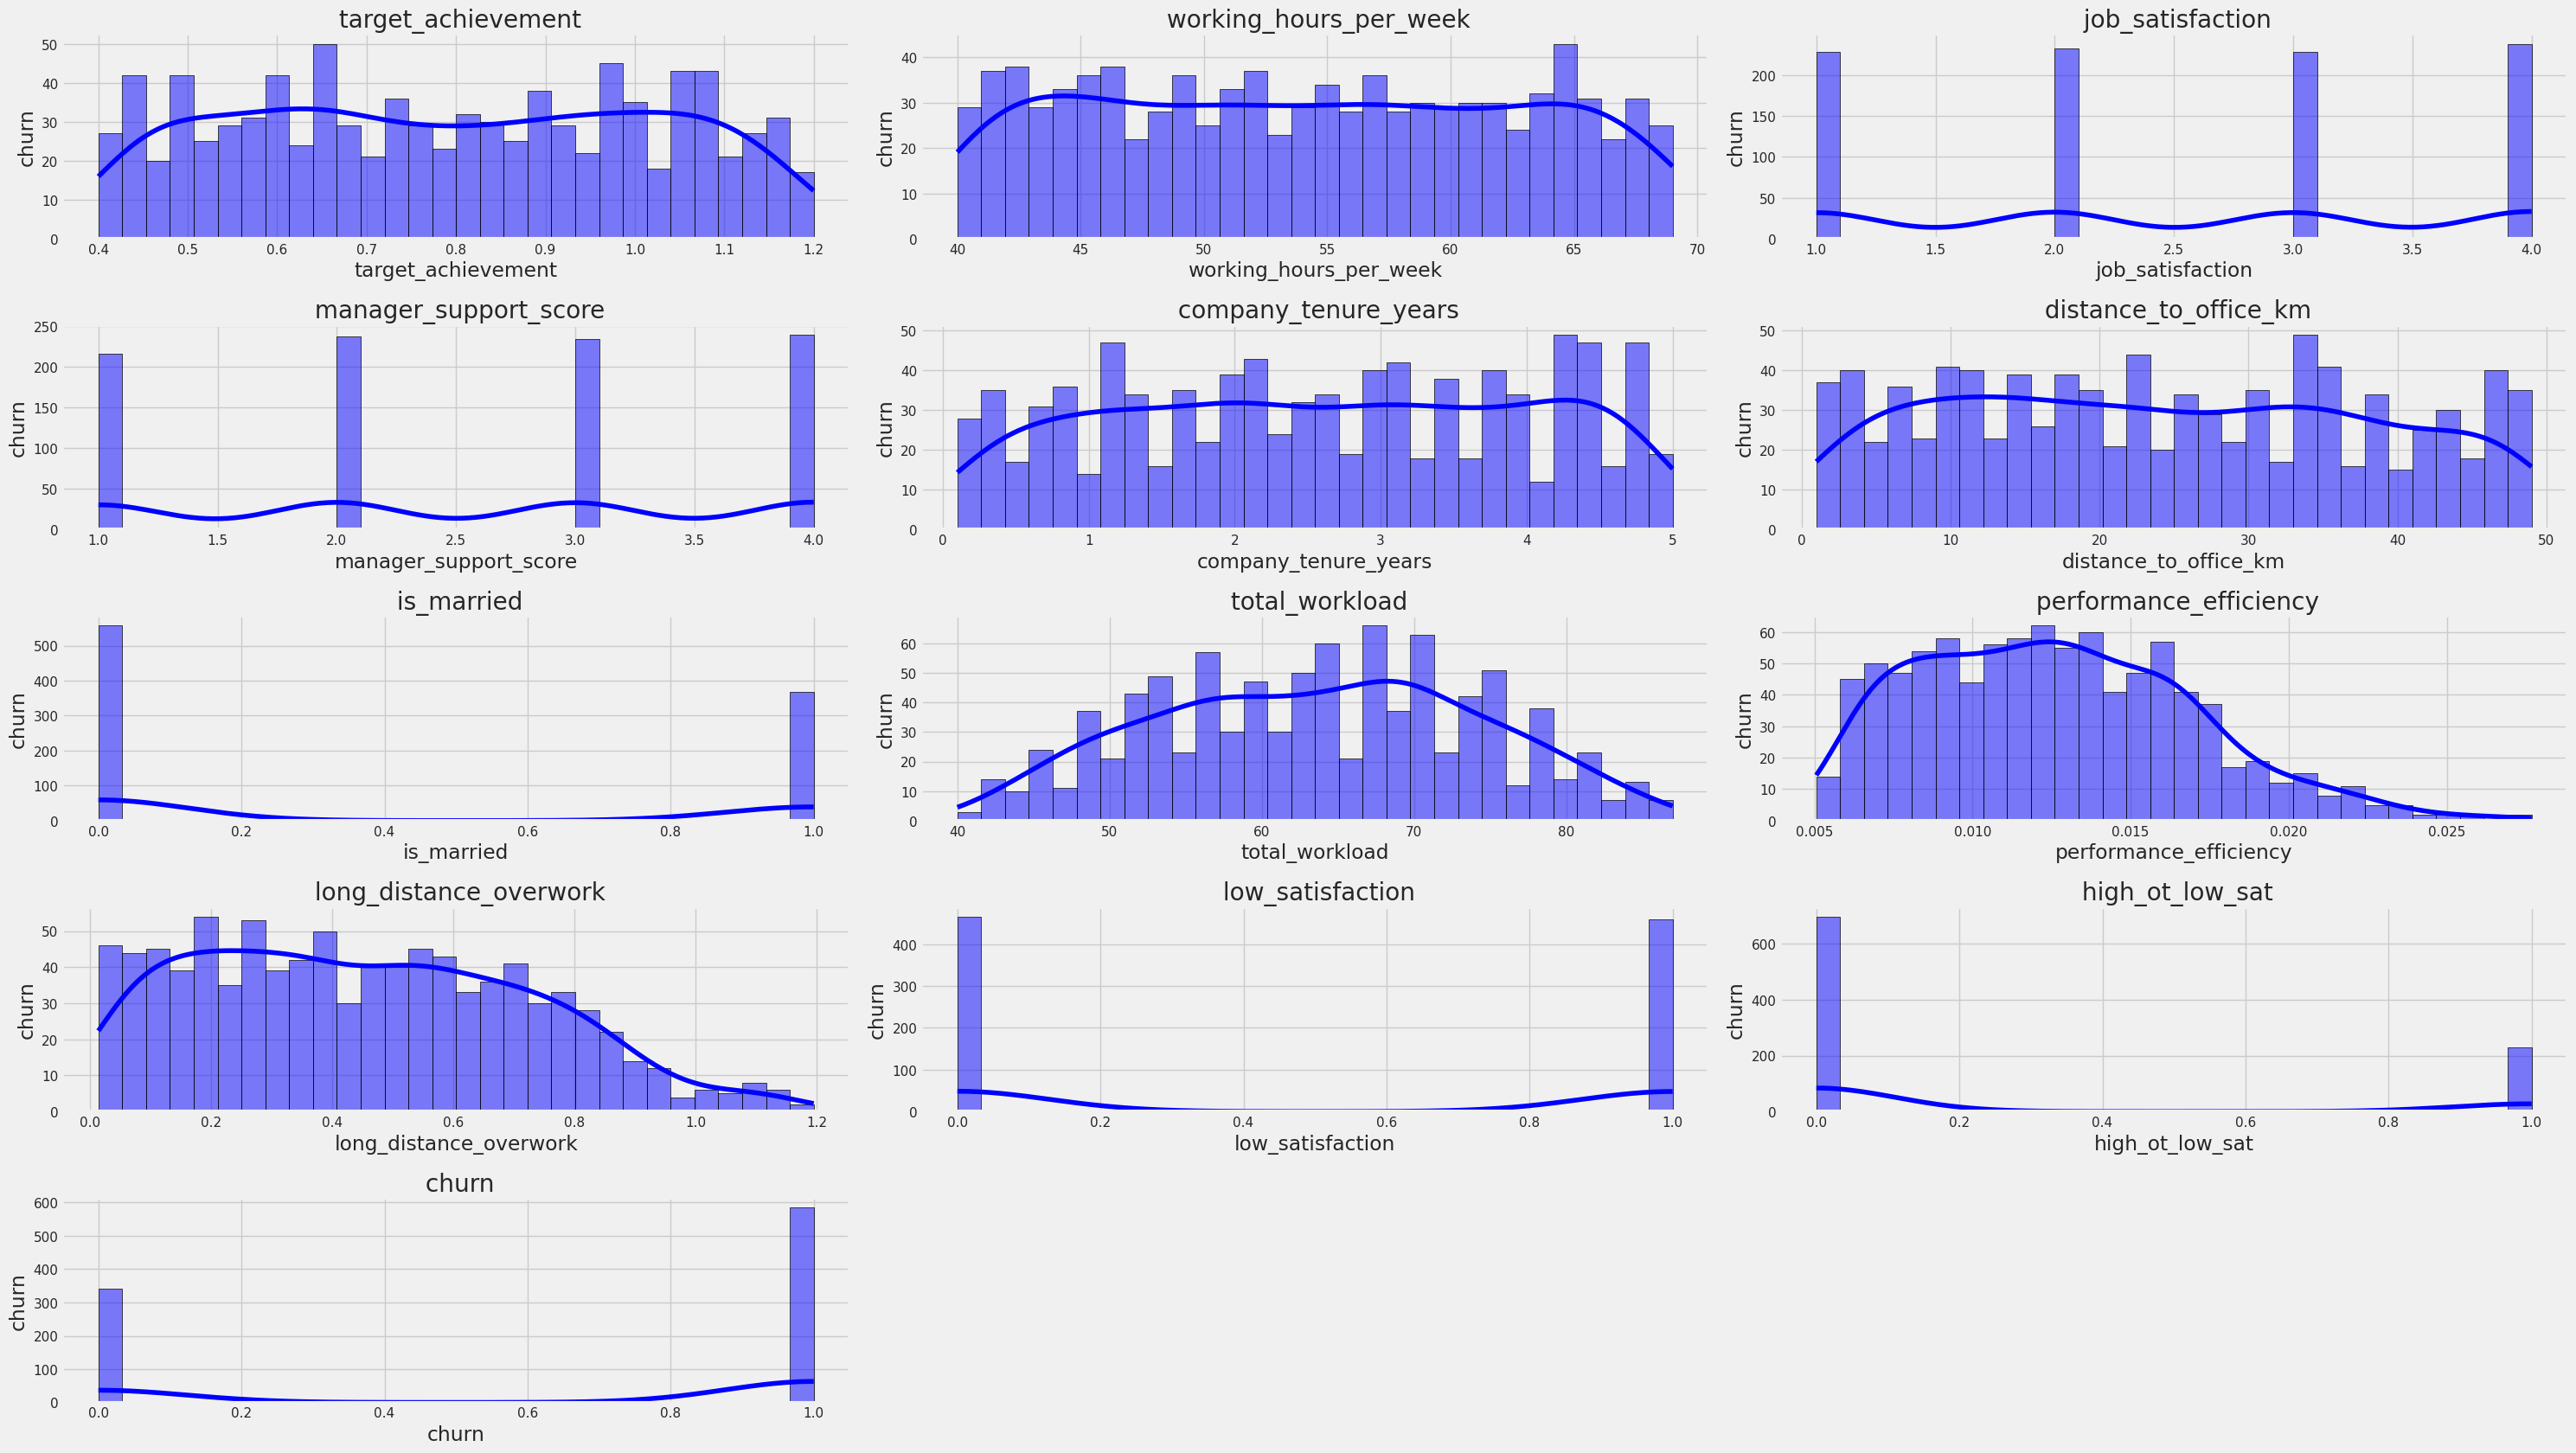

In [ ]:
# fit plot size
plt.figure(figsize=(30, 30))

# Generate Histogram and Distribution Line for 'Numerical_cols'
for i, col in enumerate(features, 1):
    plt.subplot(9, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f' {col}')
    plt.xlabel(col)
    plt.ylabel('churn')

plt.tight_layout()
plt.show()

1. Untuk distribusi sudah cukup normal, mungkin tidak perlu melakukan standarisasi ataupun log-scalling
2. sedangkan untuk target tidak perlu dilakukan class imbalance karena

In [ ]:
def categorize_tenure(years):
  if years < 2 :
    return 'junior'
  elif years < 5 :
    return 'mid level'
  else:
    return 'senior'

df['tenure_category'] = df['company_tenure_years'].apply(categorize_tenure)

In [ ]:
df['tenure_category'].value_counts()

,count
tenure_category,
mid level,580
junior,339
senior,7
